### Import essential libabries and load the dataset

In [29]:
import pandas as pd
import numpy as np



#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('AmesHousing.tsv', delimiter = '\t')

In [6]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [50]:
df.drop("Order", axis=1, inplace=True)
df.drop("PID", axis=1, inplace=True)


In [25]:
shape = df.shape
print(shape)

(2930, 82)


In [23]:
#check data type
def count_data_types(df):
    data_types = df.dtypes
    count = data_types.value_counts()
    return count

result = count_data_types(df)
print(result)

object     43
int64      28
float64    11
Name: count, dtype: int64


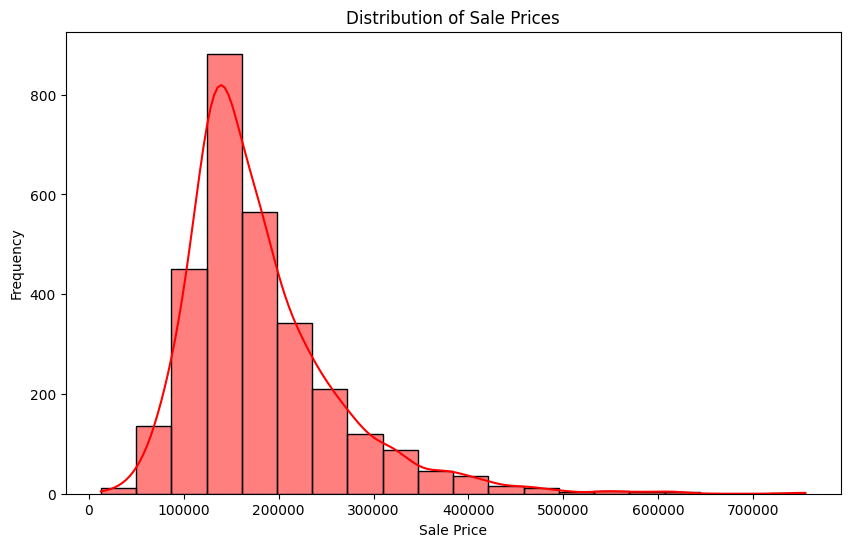

In [41]:
#create a figure with its size
plt.figure(figsize= (10,6))
plt.xlabel('Sale Price', fontsize=10), plt.ylabel('Frequency', fontsize=10)

#creating a histogram
sns.histplot(df["SalePrice"], bins=20, color='red' , kde=True)

plt.title('Distribution of Sale Prices', fontsize=12)

# Enable grid lines for better readability
#plt.grid(True, linestyle='--', alpha=0.6)

# Customize the appearance of the grid lines
#plt.gca().set_axisbelow(True)  # Ensure grid lines are behind the bars

plt.show()

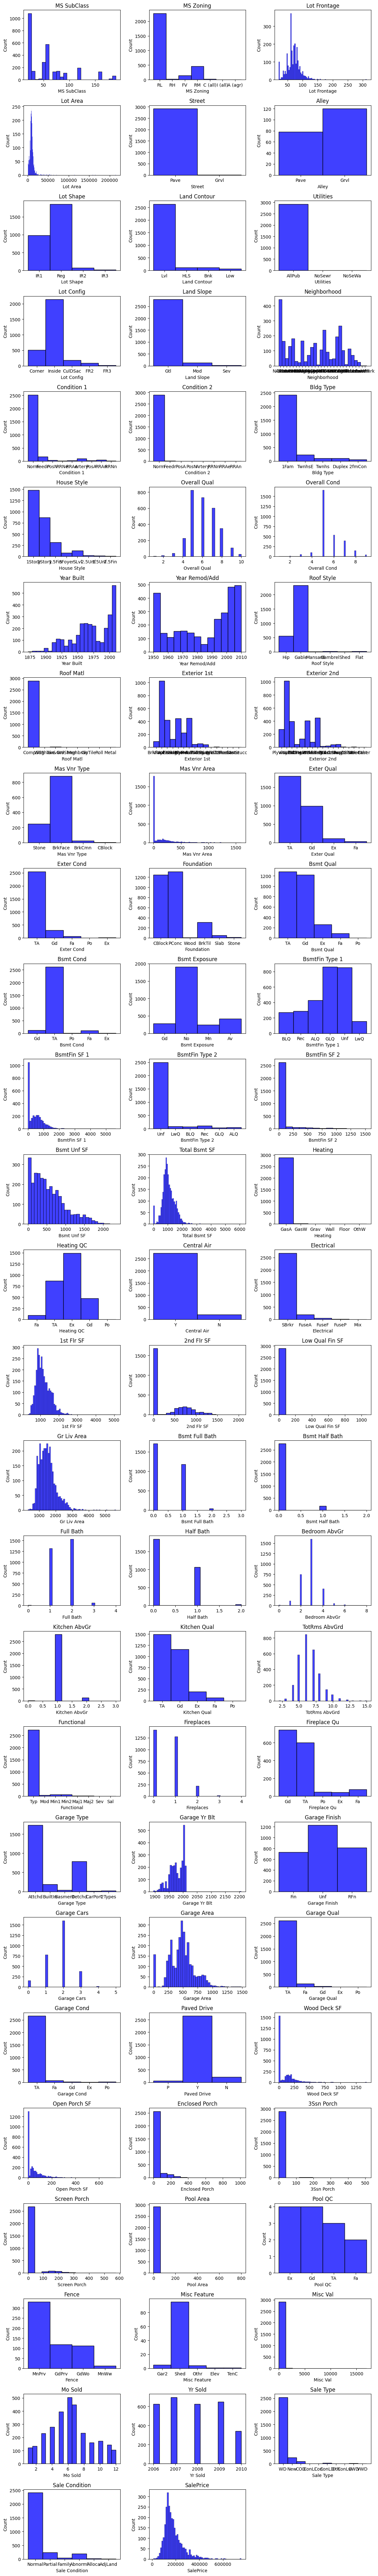

In [51]:
# Calculate the number of columns per row in the subplot grid
columns_per_row = 3  # You can adjust this value based on your preference

# Calculate the number of rows required to accommodate all columns
num_cols = len(df.columns)
num_rows = (num_cols + columns_per_row - 1) // columns_per_row

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 3 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of subplots

# Plot distplots for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, color="blue")
    ax.set_title(column)

# Remove any empty subplots (if the number of columns isn't a multiple of 3)
for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes[i])

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Finding missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

##### Based on the above result, some columns contain missing values. So I want to determine the quantity of missing values present in each column.

In [19]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Print the columns with missing values
missing_values= missing_values[missing_values > 0]


# Sort the missing values in ascending order
missing_values_sorted = missing_values.sort_values(ascending=False)

# Print the sorted missing values
print(missing_values_sorted)





Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


In [14]:
# Identify which columns have missing features
def missing_features(houses):
    missing_values = df.isnull().sum()*100/len(df)

    return print ('The percentage of missing values for each column is listed below:'
                  '\n \n'
                  f'{missing_values[missing_values>0].sort_values(ascending=False).round(2)}')
    
missing_features(df)

The percentage of missing values for each column is listed below:
 
Pool QC           99.56
Misc Feature      96.38
Alley             93.24
Fence             80.48
Mas Vnr Type      60.58
Fireplace Qu      48.53
Lot Frontage      16.72
Garage Cond        5.43
Garage Qual        5.43
Garage Finish      5.43
Garage Yr Blt      5.43
Garage Type        5.36
Bsmt Exposure      2.83
BsmtFin Type 2     2.76
Bsmt Cond          2.73
Bsmt Qual          2.73
BsmtFin Type 1     2.73
Mas Vnr Area       0.78
Bsmt Half Bath     0.07
Bsmt Full Bath     0.07
BsmtFin SF 1       0.03
Garage Cars        0.03
Garage Area        0.03
Total Bsmt SF      0.03
Bsmt Unf SF        0.03
BsmtFin SF 2       0.03
Electrical         0.03
dtype: float64


#### To remove missing value, I set the cutoff for the maximum allowed missing data points to be 10%. 

In [21]:
# Remove column features that are missing more than 10% of their values

def transform_features(houses):
    missing = houses.isnull().sum()
    missing_houses = missing[missing>(len(houses)/10)]
    houses_modified = houses.drop(missing_houses.index,axis=1)
    return houses_modified

transformed_houses = transform_features(df)

transformed_houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Q

### Cleaning the dataset

In [26]:
# Identify whcih features still have missing values
def missing_values (df):
    missing_values = transformed_houses.isnull().sum()
    incomplete_columns = missing_values[missing_values>0]
    incomplete_columns = incomplete_columns.index
    return print(transformed_houses[incomplete_columns].info())

print(f'\033[1mHere are the features that still contain missing values:\033[0m \n')
missing_values(transformed_houses)

Here are the features that still contain missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mas Vnr Area    2907 non-null   float64
 1   Bsmt Qual       2850 non-null   object 
 2   Bsmt Cond       2850 non-null   object 
 3   Bsmt Exposure   2847 non-null   object 
 4   BsmtFin Type 1  2850 non-null   object 
 5   BsmtFin SF 1    2929 non-null   float64
 6   BsmtFin Type 2  2849 non-null   object 
 7   BsmtFin SF 2    2929 non-null   float64
 8   Bsmt Unf SF     2929 non-null   float64
 9   Total Bsmt SF   2929 non-null   float64
 10  Electrical      2929 non-null   object 
 11  Bsmt Full Bath  2928 non-null   float64
 12  Bsmt Half Bath  2928 non-null   float64
 13  Garage Type     2773 non-null   object 
 14  Garage Yr Blt   2771 non-null   float64
 15  Garage Finish   2771 non-null   object 
 16  Garage Cars     292

##### The dataset includes 20 features that contain missing values. These features include both numerical and categorical data. My approach involves replacing the missing values in each feature with the most frequently occurring value within that specific column, whether it's a numeric or categorical attribute. This method is applicable to both types of data.

In [27]:
# Replace missing features with the mode for that feature column
def fill_na_mode(transformed_houses):
    return transformed_houses.fillna(transformed_houses.mode().to_dict(orient='records')[0])

transformed_houses = fill_na_mode(transformed_houses)

print(f'\033[1mHere are the features that still contain missing values:\033[0m \n')

# Verify that all missing values have been filled.
missing_values(transformed_houses)

Here are the features that still contain missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Empty DataFrame
None


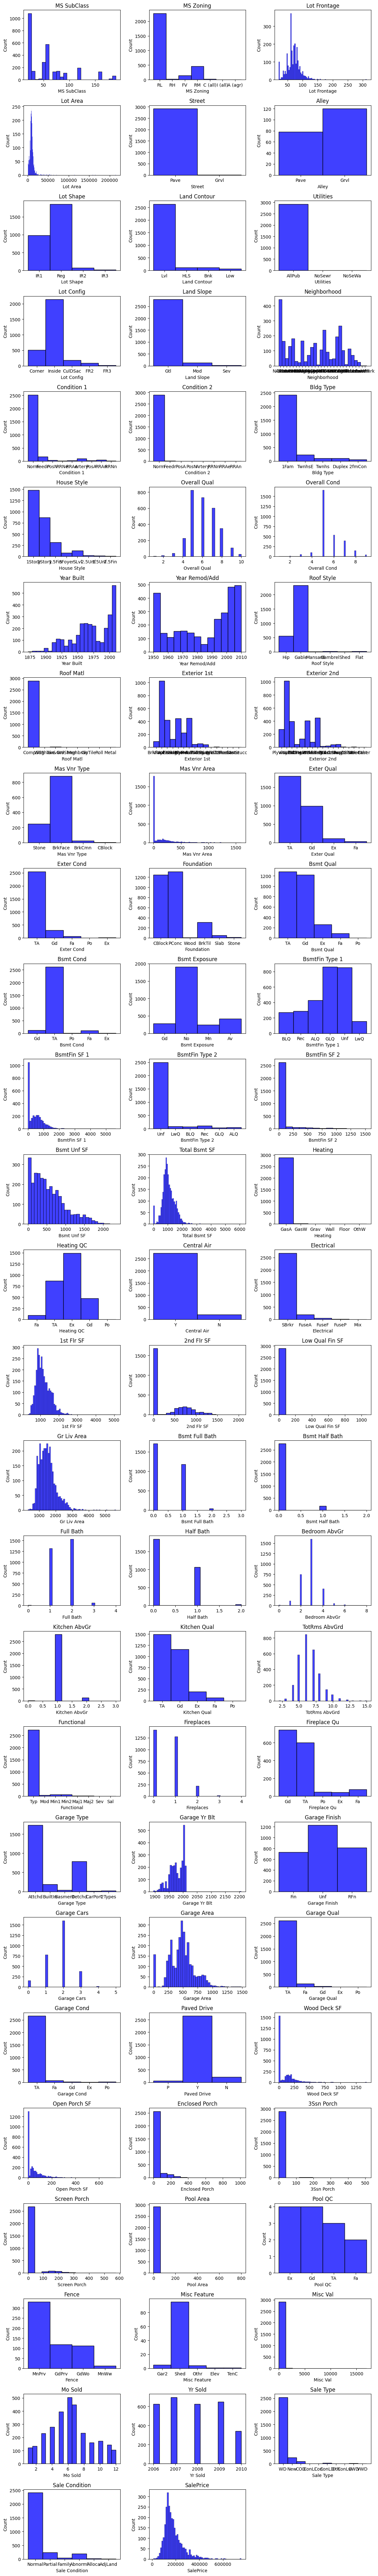

In [52]:
# Calculate the number of columns per row in the subplot grid
columns_per_row = 3  # You can adjust this value based on your preference

# Calculate the number of rows required to accommodate all columns
num_cols = len(df.columns)
num_rows = (num_cols + columns_per_row - 1) // columns_per_row

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 3 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of subplots

# Plot distplots for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, color="blue")
    ax.set_title(column)

# Remove any empty subplots (if the number of columns isn't a multiple of 3)
for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes[i])

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

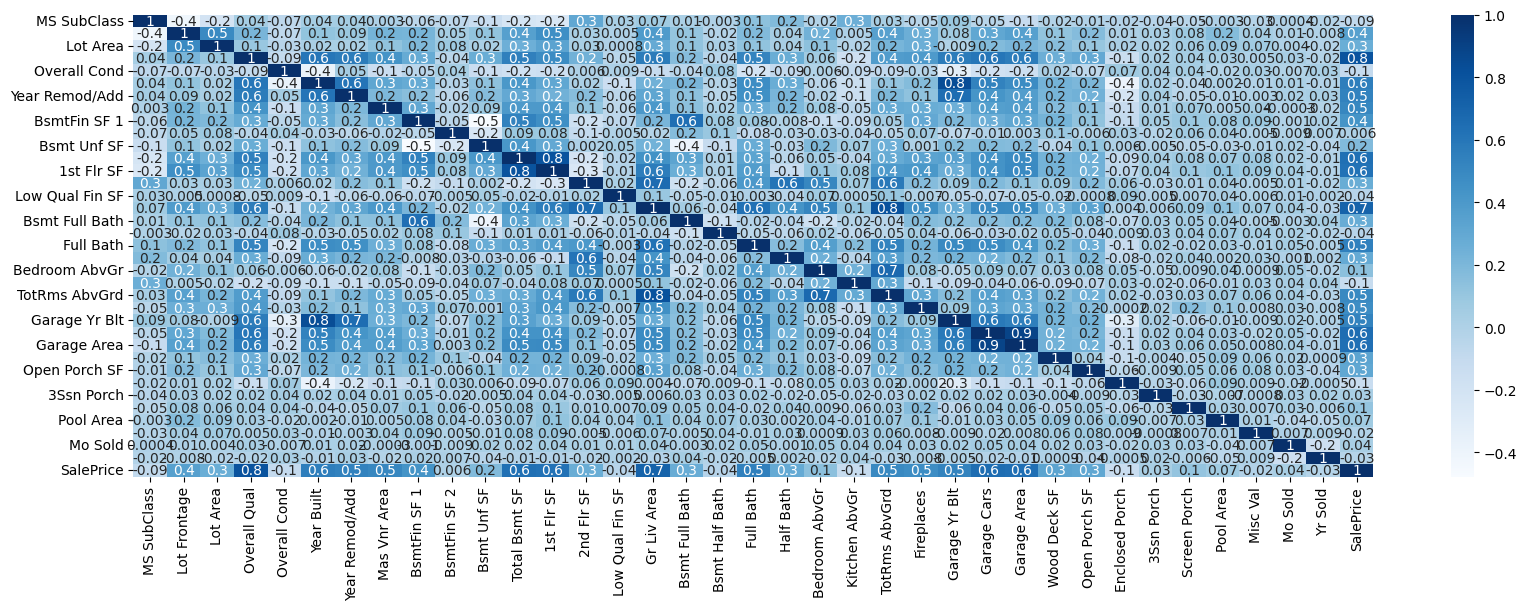

In [57]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
cor = numeric_df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1g')
plt.show()


In [56]:
#df = pd.get_dummies(df, columns=['Categorical_Column'])
#cor = df.corr()
#plt.figure(figsize=(10, 6))
#sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1g')
#plt.show()


KeyError: "None of [Index(['Categorical_Column'], dtype='object')] are in the [columns]"